## Access Hydrological Observations

This notebook is used access hydrological data from the Meterological Services Canada API.
This is includes:
- Real time gauge data for discharge and water level
- Historic daily discharge
- Annual statistics for discharge and water level

It was developed using helpful, open access information provided by [MSC GeoMet services](https://eccc-msc.github.io/open-data/usage/use-case_oafeat/use-case_oafeat-script_en/).

In [2]:
# Import needed modules
from datetime import date
import sys
import pandas as pd
from pathlib import Path

# Import local scripts
sys.path.append('../scripts')
from plotting import plot_watershed_flowlines_stations
from scalar_data_access import retrieve_real_time_data, retrieve_historic_data, retrieve_data_from_api
from hydrograph_plotting import plot_realtime_hydrograph_with_historical_ranges
# Plot in notebook
%matplotlib inline

# add autoreload to automatically reload modules when they change
%load_ext autoreload
%autoreload 2

In [3]:
# Set up logger
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

#Suppress info from matplotlib
logging.getLogger('matplotlib.category').disabled = True


In [4]:
# Set variables, this can be replaced by a config file. To be discussed
api_url = "https://api.weather.gc.ca/"

stations_csv = '../gis_data/hydrometric_Bow.csv'
watershed_shp = '../gis_data/Bow_Basins.shp'
flowlines_shp = '../gis_data/Bow_Flowlines.shp'

# Read in the list of hydrometric stations
hydro_stations_df = pd.read_csv(stations_csv)
search_stations = hydro_stations_df["ID"].tolist()


## Define stations to be imported

Hydrometric station data can be accessed and downloaded.
This is for near real time data as well as historic record.

In this notebook, the stations are read from a provided csv file.
This could be substituted with any list of stations. Station information can also be pulled from the MSC API.

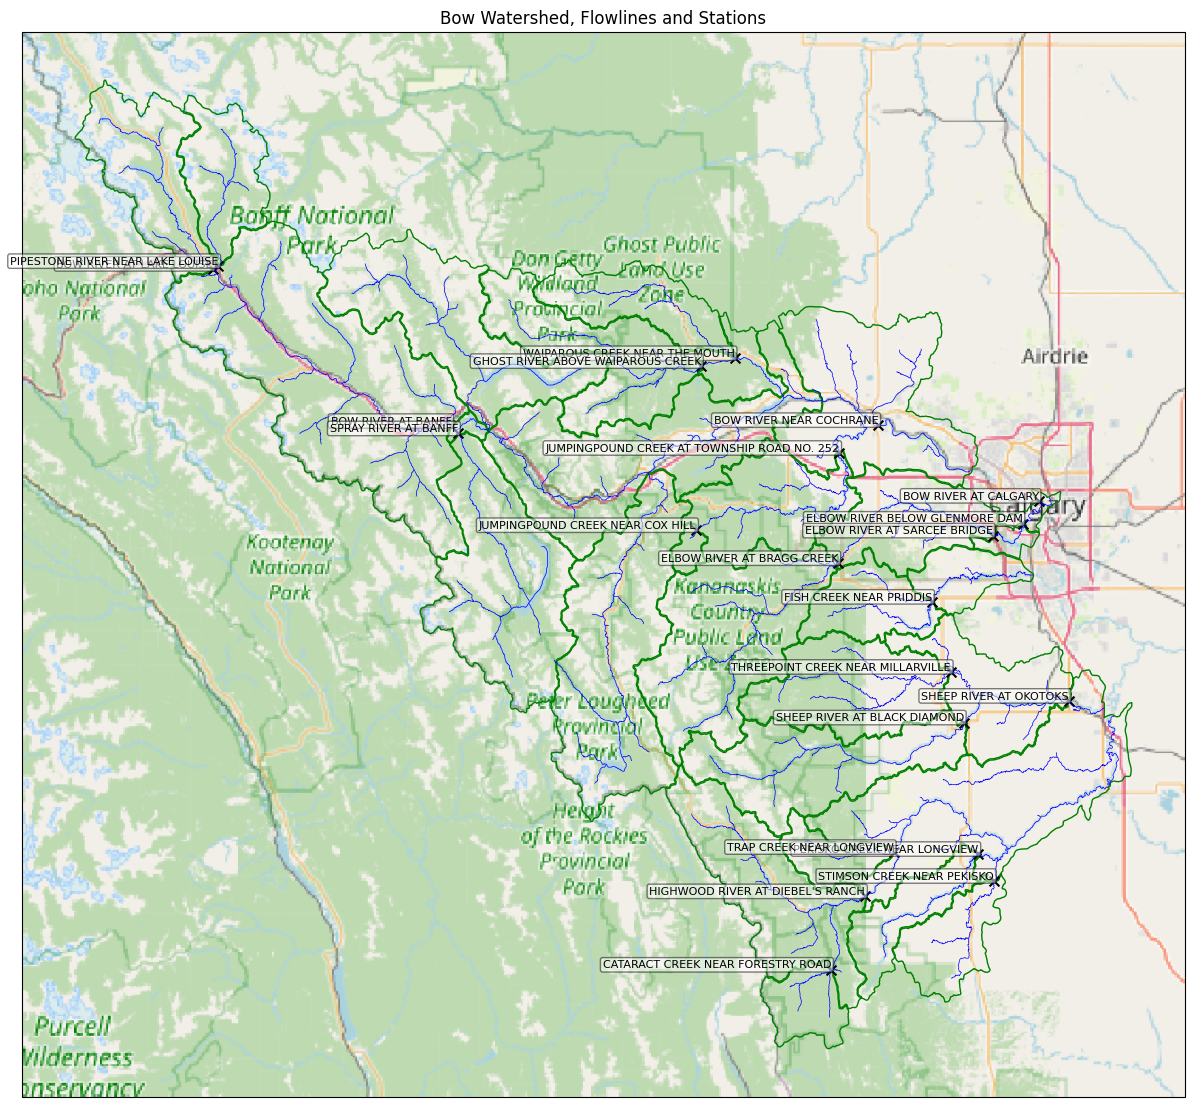

In [5]:
# Plot the stations on a map
plot_watershed_flowlines_stations(watershed_shp, flowlines_shp, stations_csv)


In [21]:

output_dir = Path('../output/')
output_dir.mkdir(parents=True, exist_ok=True)

collection = 'hydrometric-realtime'
datetime_column = "DATETIME"


download_variable = "DISCHARGE"
real_time_discharge_stations = retrieve_data_from_api(search_stations, collection, download_variable, datetime_column, api_url, output_dir)

download_variable = "LEVEL"
real_time_level_stations = retrieve_data_from_api(search_stations, collection, download_variable, datetime_column, api_url, output_dir)


INFO:scalar_data_access:Retrieving DISCHARGE from hydrometric-realtime with no time limits


INFO:scalar_data_access:DISCHARGE from hydrometric-realtime for station 05BA002 output to ../output/hydrometric-realtime/05BA002_DISCHARGE.csv
INFO:scalar_data_access:DISCHARGE from hydrometric-realtime for station 05BB001 output to ../output/hydrometric-realtime/05BB001_DISCHARGE.csv
INFO:scalar_data_access:DISCHARGE from hydrometric-realtime for station 05BC001 output to ../output/hydrometric-realtime/05BC001_DISCHARGE.csv
INFO:scalar_data_access:DISCHARGE from hydrometric-realtime for station 05BG006 output to ../output/hydrometric-realtime/05BG006_DISCHARGE.csv
INFO:scalar_data_access:DISCHARGE from hydrometric-realtime for station 05BG010 output to ../output/hydrometric-realtime/05BG010_DISCHARGE.csv
INFO:scalar_data_access:DISCHARGE from hydrometric-realtime for station 05BH004 output to ../output/hydrometric-realtime/05BH004_DISCHARGE.csv
INFO:scalar_data_access:DISCHARGE from hydrometric-realtime for station 05BH005 output to ../output/hydrometric-realtime/05BH005_DISCHARGE.csv

In [24]:
collection = 'hydrometric-daily-mean'
datetime_column = "DATE"


download_variable = "DISCHARGE"
other_variables = ['DISCHARGE_SYMBOL_EN']
historic_discharge_stations = retrieve_data_from_api(search_stations, collection, download_variable, datetime_column, api_url, output_dir,other_variables)

download_variable = "LEVEL"
other_variables = ['LEVEL_SYMBOL_EN']
historic_level_stations = retrieve_data_from_api(search_stations, collection, download_variable, datetime_column, api_url, output_dir,other_variables)

INFO:scalar_data_access:Retrieving DISCHARGE from hydrometric-daily-mean with no time limits


INFO:scalar_data_access:DISCHARGE from hydrometric-daily-mean for station 05BJ004 output to ../output/hydrometric-daily-mean/05BJ004_DISCHARGE.csv
INFO:scalar_data_access:Retrieving LEVEL from hydrometric-daily-mean with no time limits
INFO:scalar_data_access:LEVEL from hydrometric-daily-mean for station 05BJ004 output to ../output/hydrometric-daily-mean/05BJ004_LEVEL.csv


In [12]:

collection = 'hydrometric-annual-statistics'

datetime_column='MAX_DATE'
download_variable = 'MAX_VALUE'
other_variables = ['MAX_SYMBOL_EN']
#max_annual_stations = retrieve_data_from_api(search_stations, collection, download_variable, datetime_column, api_url, output_dir,other_variables)

datetime_column='MIN_DATE'
download_variable = 'MIN_VALUE'
other_variables = ['MIN_SYMBOL_EN']
max_annual_stations = retrieve_data_from_api(search_stations, collection, download_variable, datetime_column, api_url, output_dir,other_variables)


INFO:scalar_data_access:Retrieving MIN_VALUE from hydrometric-annual-statistics with no time limits
INFO:scalar_data_access:MIN_VALUE from hydrometric-annual-statistics for station 05BA001 output to ../output/hydrometric-annual-statistics/05BA001_MIN_VALUE.csv
INFO:scalar_data_access:MIN_VALUE from hydrometric-annual-statistics for station 05BA002 output to ../output/hydrometric-annual-statistics/05BA002_MIN_VALUE.csv
INFO:scalar_data_access:MIN_VALUE from hydrometric-annual-statistics for station 05BB001 output to ../output/hydrometric-annual-statistics/05BB001_MIN_VALUE.csv
INFO:scalar_data_access:MIN_VALUE from hydrometric-annual-statistics for station 05BC001 output to ../output/hydrometric-annual-statistics/05BC001_MIN_VALUE.csv
INFO:scalar_data_access:MIN_VALUE from hydrometric-annual-statistics for station 05BG006 output to ../output/hydrometric-annual-statistics/05BG006_MIN_VALUE.csv
INFO:scalar_data_access:MIN_VALUE from hydrometric-annual-statistics for station 05BG010 output

Real time stations with LEVEL data: ['05BA002', '05BB001', '05BC001', '05BG006', '05BG010', '05BH004', '05BH005', '05BH013', '05BH015', '05BJ001', '05BJ004', '05BJ010', '05BL012', '05BL013', '05BL014', '05BL022']


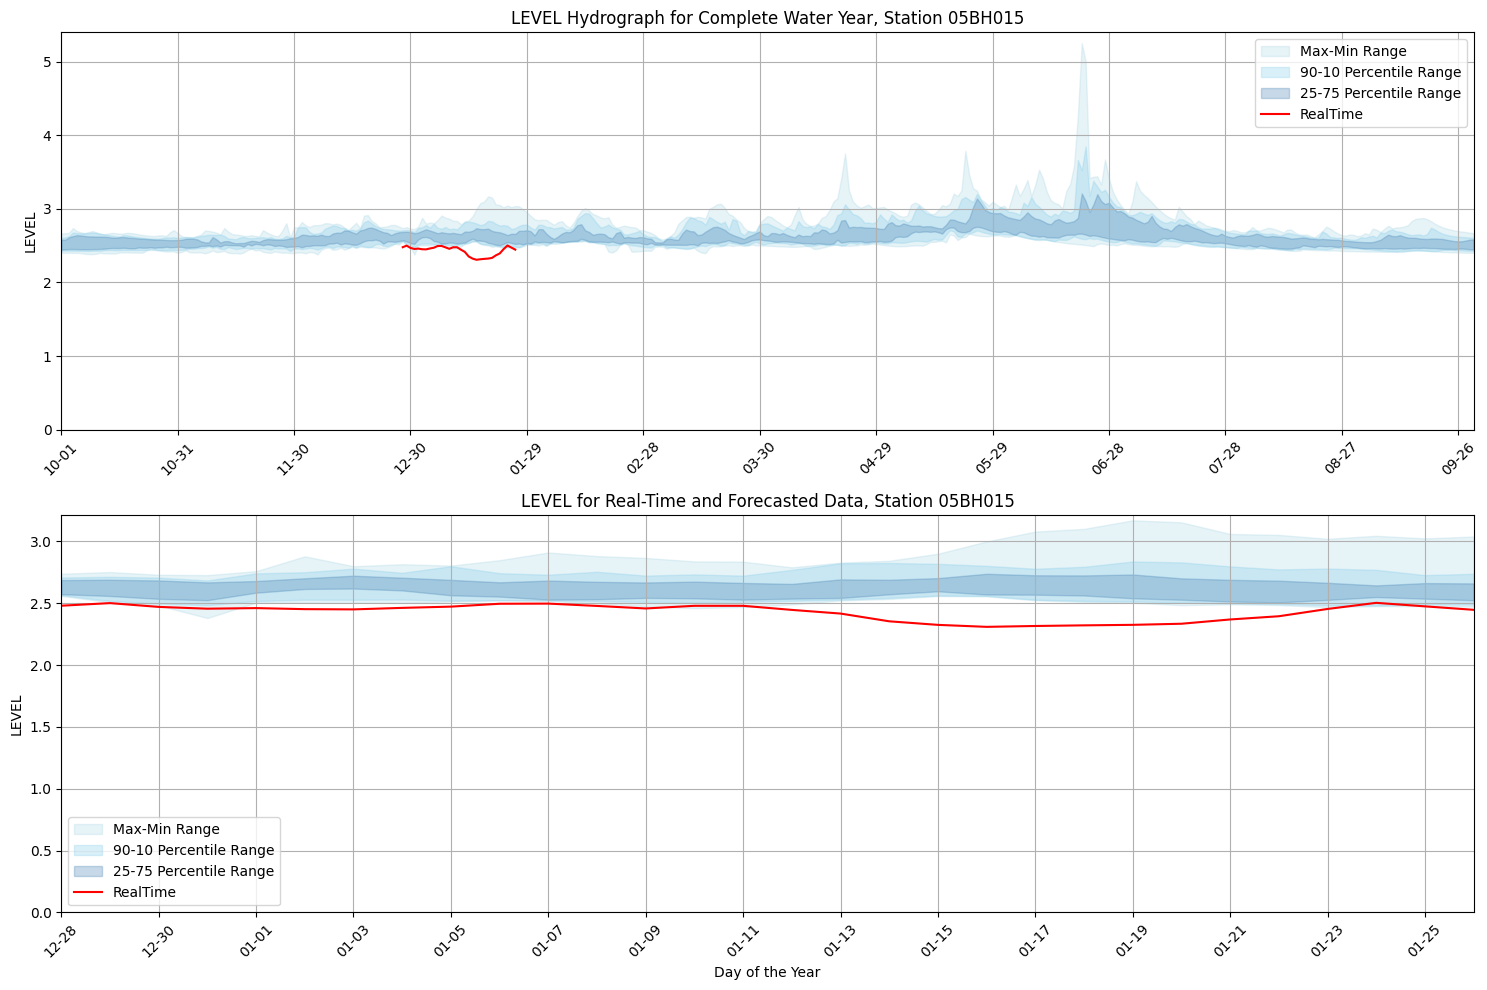

<Figure size 640x480 with 0 Axes>

In [26]:
variable = 'LEVEL'

real_time_level_stations = ['05BH015']
historic_level_stations = ['05BH015']

print(f'Real time stations with {variable} data: {real_time_discharge_stations}')
for station_id in real_time_level_stations:
    if station_id not in historic_level_stations:
        continue
    
    historic_df = pd.read_csv(f'{output_dir}/hydrometric-daily-mean/{station_id}_{variable}.csv')
    realtime_df = pd.read_csv(f'{output_dir}/hydrometric-realtime/{station_id}_{variable}.csv')
    png_path = f'{output_dir}/{station_id}_{variable}_hydrograph.png'

    plot_realtime_hydrograph_with_historical_ranges(station_id,variable, historic_df, realtime_df, save_png=True, png_path=png_path)

NameError: name 'hydrometric_data' is not defined

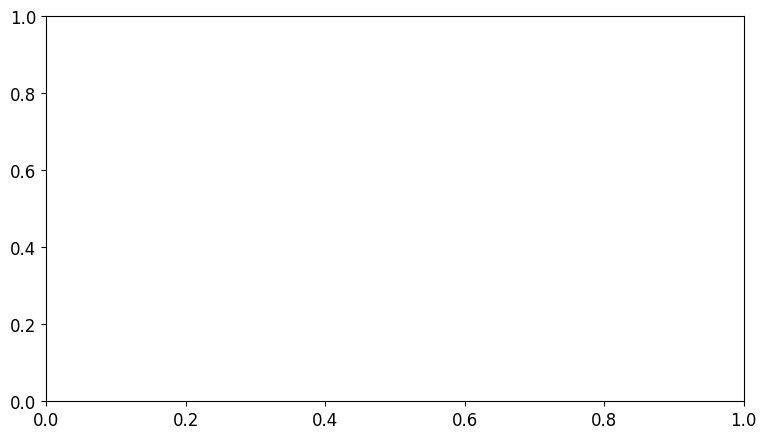

In [10]:
# Creation of an interactive plot with Matplotlib

# Hydrometric station to display on the plot
station_displayed_p = search_stations[1]

# Function to create a plot for the chosen hydrometric station
def interactive_plot(station):
    # Adjusting font and figure size
    params = {
        "legend.fontsize": "14",
        "figure.figsize": (9, 5),
        "axes.labelsize": "14",
        "axes.titlesize": "16",
        "xtick.labelsize": "12",
        "ytick.labelsize": "12",
    }
    plt.rcParams.update(params)
    
    # Creation of the plot
    fig, ax = plt.subplots()
    line, = plt.plot(
        hydrometric_data[station].index,
        hydrometric_data[station]["LEVEL"],
        marker="o",
        label="Daily mean",
    )
    plt.legend()
    plt.grid(True, which="both")
    ax.set_title(
        fill(
            "Water levels at station {} ({})".format(
                hydrometric_data[station]["STATION_NAME"].iloc[0], station
            ), 60
        )
    )
    ax.set_ylabel("Water level (m)")
    ax.set_xlabel("Date")

    # Modification of the x axis ticks and tick labels
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    # Creation of the annotations to display on hover
    annot = ax.annotate(
        "",
        xy=(0, 0),
        xytext=(-60, -40),
        textcoords="offset points",
        bbox=dict(boxstyle="round", fc="w"),
        arrowprops=dict(arrowstyle="->"),
    )
    annot.set_visible(False)

    return line, annot, ax, fig


# Choosing the hydrometric stations to create the plot
line, annot, ax, fig = interactive_plot(station_displayed_p)


# Updating the annotation with the data point information
def update_annot(ind):
    # Identifying the annotation to display
    x, y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    
    # Adding text to the annotation (date and water level)
    date_x = x[ind["ind"]][0]
    level_y = round(y[ind["ind"]][0], 2)
    text = "{}\nDaily mean: {} m".format(date_x, level_y)
    annot.set_text(text)
    
    # Setting annotation transparency
    annot.get_bbox_patch().set_alpha(0.8)


# Display of annotations on hover
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = line.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()


# Adding the feature that displays annotations on hover               
fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

/var/folders/cf/h3xm_pj57nxdnm6lk83rzxt9jt0gpj/T/ipykernel_14987/498741574.py:47: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(
/var/folders/cf/h3xm_pj57nxdnm6lk83rzxt9jt0gpj/T/ipykernel_14987/498741574.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(


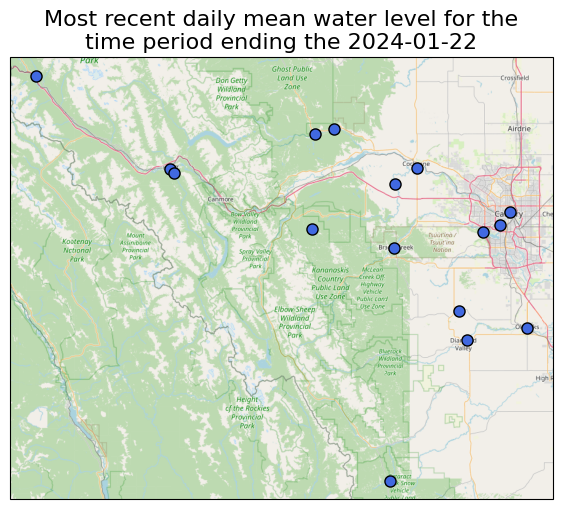

In [ ]:
# Creation of the interactive map

# Lists of positions and labels
labels = []
all_lat = []
all_lon = []
for station in stations:
    latest_data = hydrometric_data[station].iloc[-1]
    labels.append(
        f"{hydrometric_data[station]['STATION_NAME'].iloc[0]}\n"
        + f"Station ID: {latest_data.STATION_NUMBER}\n"
        + f"Date: {latest_data.name}\n"
        + f"Water level: {round(latest_data.LEVEL, 2)} m"
    )
    all_lat.append(latest_data.LATITUDE)
    all_lon.append(latest_data.LONGITUDE)

# List for keeping track of all annotations
annotations = [None for label in labels]

# Defining size of markers
markersize = 8
markersize_inches = markersize / 72.0

# Setting up figure
tiler = OSM()
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=tiler.crs)
ax.set_title(fill(
    "Most recent daily mean water level for the "
    + f"time period ending the {end_date}", 45))

# Setting the extent to see adequately all data points
ax.set_extent(
    [
        min(all_lon) * 1.001,
        max(all_lon) * 0.999,
        min(all_lat) * 0.999,
        max(all_lat) * 1.001,
    ]
)

# Adding a basemap from Open Street Map
ax.add_image(tiler, 9)

# Adding data points
ax.plot(
    all_lon,
    all_lat,
    "bo",
    marker="o",
    mec="k",
    color="RoyalBlue",
    ms=markersize,
    transform=ccrs.Geodetic(),
)

# Figure coordinates in inches
trans = ax.transData + fig.dpi_scale_trans.inverted()


# Function for checking mouse coordinates and annotating
def on_move(event):
    if event.inaxes:
        # Transforming the coordinates in the same projection as the plot
        xproj, yproj = zip(
            *[
                ax.projection.transform_point(x, y, src_crs=ccrs.Geodetic())
                for x, y in zip(all_lon, all_lat)
            ]
        )
        # Event coordinates in inches
        x0, y0 = trans.transform((event.xdata, event.ydata))
        # Data points coordinates in inches
        xfig, yfig = zip(
            *[trans.transform((x, y)) for x, y in zip(xproj, yproj)]
        )
        # Distance of the mouse from the data point
        dists = [math.sqrt((x - x0) ** 2 + (y - y0) ** 2) for x, y in zip(
            xfig, yfig
        )]
        
        # Displaying annotations on hover
        for n, (x, y, dist, label) in enumerate(
                zip(xproj, yproj, dists, labels)
        ):
            if dist < markersize_inches and annotations[n] is None:
                annotations[n] = ax.annotate(
                    label,
                    [x, y],
                    xycoords="data",
                    xytext=(10, 10),
                    textcoords="offset points",
                    ha="center",
                    va="bottom",
                    bbox=dict(
                        facecolor="white",
                        edgecolor="black",
                        boxstyle="round"
                    ),
                    zorder=10,
                )
                fig.canvas.draw()

            elif dist > markersize_inches and annotations[n] is not None:
                annotations[n].remove()
                annotations[n] = None
                fig.canvas.draw()


# Connecting the event handler
cid = fig.canvas.mpl_connect("motion_notify_event", on_move)

plt.show()